In [1]:
# From Python
# It requires OpenCV installed for Python

import matplotlib.pyplot as plt
import numpy as np


import sys
import cv2
import os
from sys import platform
import argparse
import time

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)

/openpose/build/examples/tutorial_api_python


In [2]:

try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append(dir_path + '/../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.)
        sys.path.append('../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e

# Flags
parser = argparse.ArgumentParser()
# parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000241.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000536.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
args = parser.parse_known_args()

# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../models/"
params["face"] = True
params["face_detector"] = 2
params["body"] = 0

# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item

# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()



In [3]:
# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()



In [4]:
# Read image and face rectangle locations
imageToProcess = cv2.imread(args[0].image_path)
faceRectangles = [
    op.Rectangle(330.119385, 277.532715, 48.717274, 48.717274),
    op.Rectangle(24.036991, 267.918793, 65.175171, 65.175171),
    op.Rectangle(151.803436, 32.477852, 108.295761, 108.295761),
]

# Create new datum
datum = op.Datum()
datum.cvInputData = imageToProcess
datum.faceRectangles = faceRectangles



Face keypoints: 
[[[ 3.44549225e+02  2.84416687e+02  3.18034403e-02]
  [ 3.44549225e+02  2.84416687e+02  1.31107762e-03]
  [ 3.43225403e+02  3.24528992e+02  4.39753849e-03]
  [ 3.44549225e+02  2.84416687e+02  3.60730628e-04]
  [ 3.43093018e+02  2.90241577e+02  1.71700008e-02]
  [ 3.43225403e+02  2.86402435e+02  3.37021356e-03]
  [ 3.30384155e+02  2.89712036e+02  1.17983501e-02]
  [ 3.30384155e+02  2.89712036e+02  3.82449798e-04]
  [ 3.38062408e+02  2.94875000e+02  2.89355144e-02]
  [ 3.35944275e+02  3.00170349e+02  4.66905208e-03]
  [ 3.47461670e+02  2.88652954e+02  5.53800957e-03]
  [ 3.47858826e+02  2.90506348e+02  3.80865522e-02]
  [ 3.44416840e+02  2.87461517e+02  1.18350729e-01]
  [ 3.42563477e+02  2.85872894e+02  5.37869073e-02]
  [ 3.38856720e+02  2.83357605e+02  6.87111020e-02]
  [ 3.36209045e+02  2.83225220e+02  4.67136614e-02]
  [ 3.49579803e+02  3.24528992e+02  3.30793555e-03]
  [ 3.50903656e+02  2.95934082e+02  8.21402948e-03]
  [ 3.50903656e+02  2.95934082e+02  1.16268592e

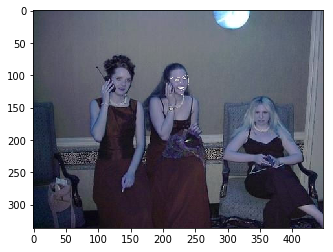

-1

In [5]:
# Process and display image
opWrapper.emplaceAndPop([datum])
print("Face keypoints: \n" + str(datum.faceKeypoints))
# cv2.imshow("OpenPose 1.4.0 - Tutorial Python API", datum.cvOutputData)
plt.imshow(datum.cvOutputData)
plt.show()
cv2.waitKey(0)